# SR-Dyna (Latent Learning Task)


In [62]:
import matplotlib.pyplot as plt
import numpy as np
import srdyna
import importlib

In [63]:
importlib.reload(srdyna)

<module 'srdyna' from '/Users/jeremygordon/repos/sr-dyna/srdyna.py'>

Loaded 10x10 world with 102 states


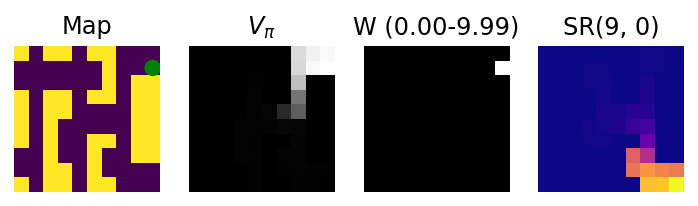

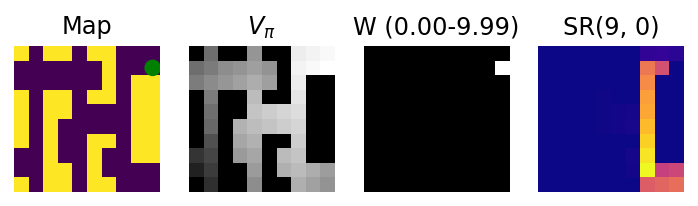

In [64]:
REPLAY = "sufficient"
EXPLORE_STEPS = 25000
POST_REWARD_STEPS = 20
REPLAY_STEPS = {
    "insufficient": 10,
    "sufficient": 10000
}[REPLAY]
env = srdyna.SimpleGridWorld(world='worlds/latent_learning.txt')
agent = srdyna.SRDyna(id=0, loc=(0, 2), env=env)

R1_LOC = (9, 8)
env.add_reward(R1_LOC, 0)  # Initially empty, but terminates

# Explore
for i in range(EXPLORE_STEPS):
    agent.step(random_policy=True)

# Increase reward
env.reward_locs[R1_LOC]['reward'] = 10  

# One-step replay samples from random sa's
agent.learn_offline(k=REPLAY_STEPS)

for i in range(POST_REWARD_STEPS):
    # Repeated one-step runs from R1
    agent.terminate_episode(reset_state=env.state_at_loc(R1_LOC))
    agent.step(verbose=False)

agent.make_plots(sr_state=9)

# One-step replay samples from random sa's
agent.learn_offline(k=REPLAY_STEPS)
    
agent.make_plots(sr_state=9)

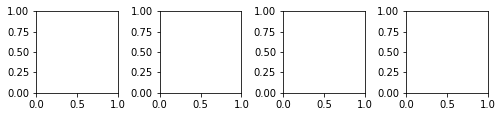

In [66]:
# Generate anim (slow)
agent.record_trials(title="latent_learning", 
                    start_locs=[(0, 2), (4, 0), (9, 0), (0, 8)])